### Lab program 7: Implement the KMeans Clustering Algorithm and the EM Algorithm tp cluster a dataset which is stored in a .csv file

In [76]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Reading Data from CSV file

In [77]:
names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
dataset = pd.read_csv("./datasets/iris.csv", names=names)

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

labels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = [labels[value] for value in y]

Model Fitting and Model Prediction for KMeans and EM

In [78]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans_pred = kmeans.predict(X)

em = GaussianMixture(n_components=3, random_state=0).fit(X)
em_pred = em.predict(X)

Model Accuracy and Confusion Matrix

In [79]:
print("KMeans Algorithm\nAccuracy Score:",accuracy_score(y,kmeans_pred))
print("Confusion Matrix:\n",confusion_matrix(y,kmeans_pred))

KMeans Algorithm
Accuracy Score: 0.8933333333333333
Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [80]:
print("EM Algorithm\nAccuracy Score:",accuracy_score(y,em_pred))
print("Confusion Matrix:\n",confusion_matrix(y,em_pred))

EM Algorithm
Accuracy Score: 0.36666666666666664
Confusion Matrix:
 [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


Scatter plots for Real Output and Predicted Outputs of each model

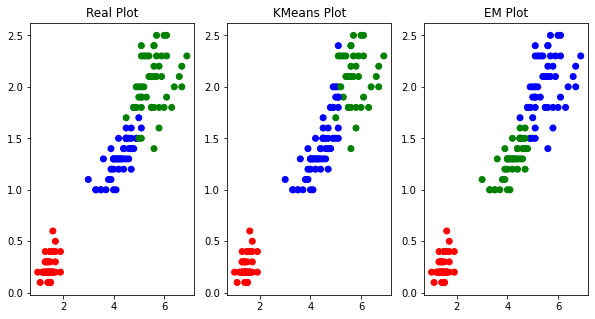

In [81]:
colors = np.array(['red', 'blue', 'green'])

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(X.Petal_Length, X.Petal_Width, color=colors[y])
plt.title('Real Plot')

plt.subplot(1,3,2)
plt.scatter(X.Petal_Length, X.Petal_Width, color=colors[kmeans_pred])
plt.title('KMeans Plot')

plt.subplot(1,3,3)
plt.scatter(X.Petal_Length, X.Petal_Width, color=colors[em_pred])
plt.title('EM Plot')
plt.show()